In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

In [2]:
#Load MNIST dataset and mormalize it:
mnist = fetch_openml('Fashion-MNIST', version=1, cache=True, as_frame= False)
mnist.keys()

np.random.seed(123)
# Select 10000 images randomly
indices = np.random.choice(70000,10000)
X = mnist.data[indices] / 255.0
y = mnist.target[indices]

print(X.shape, y.shape)

(10000, 784) (10000,)


In [3]:
# Apply PCA and get the first two principal components
pca = PCA(n_components=2)

# We get the components by 
# calling fit_transform method with our data
pca_components = pca.fit_transform(X)

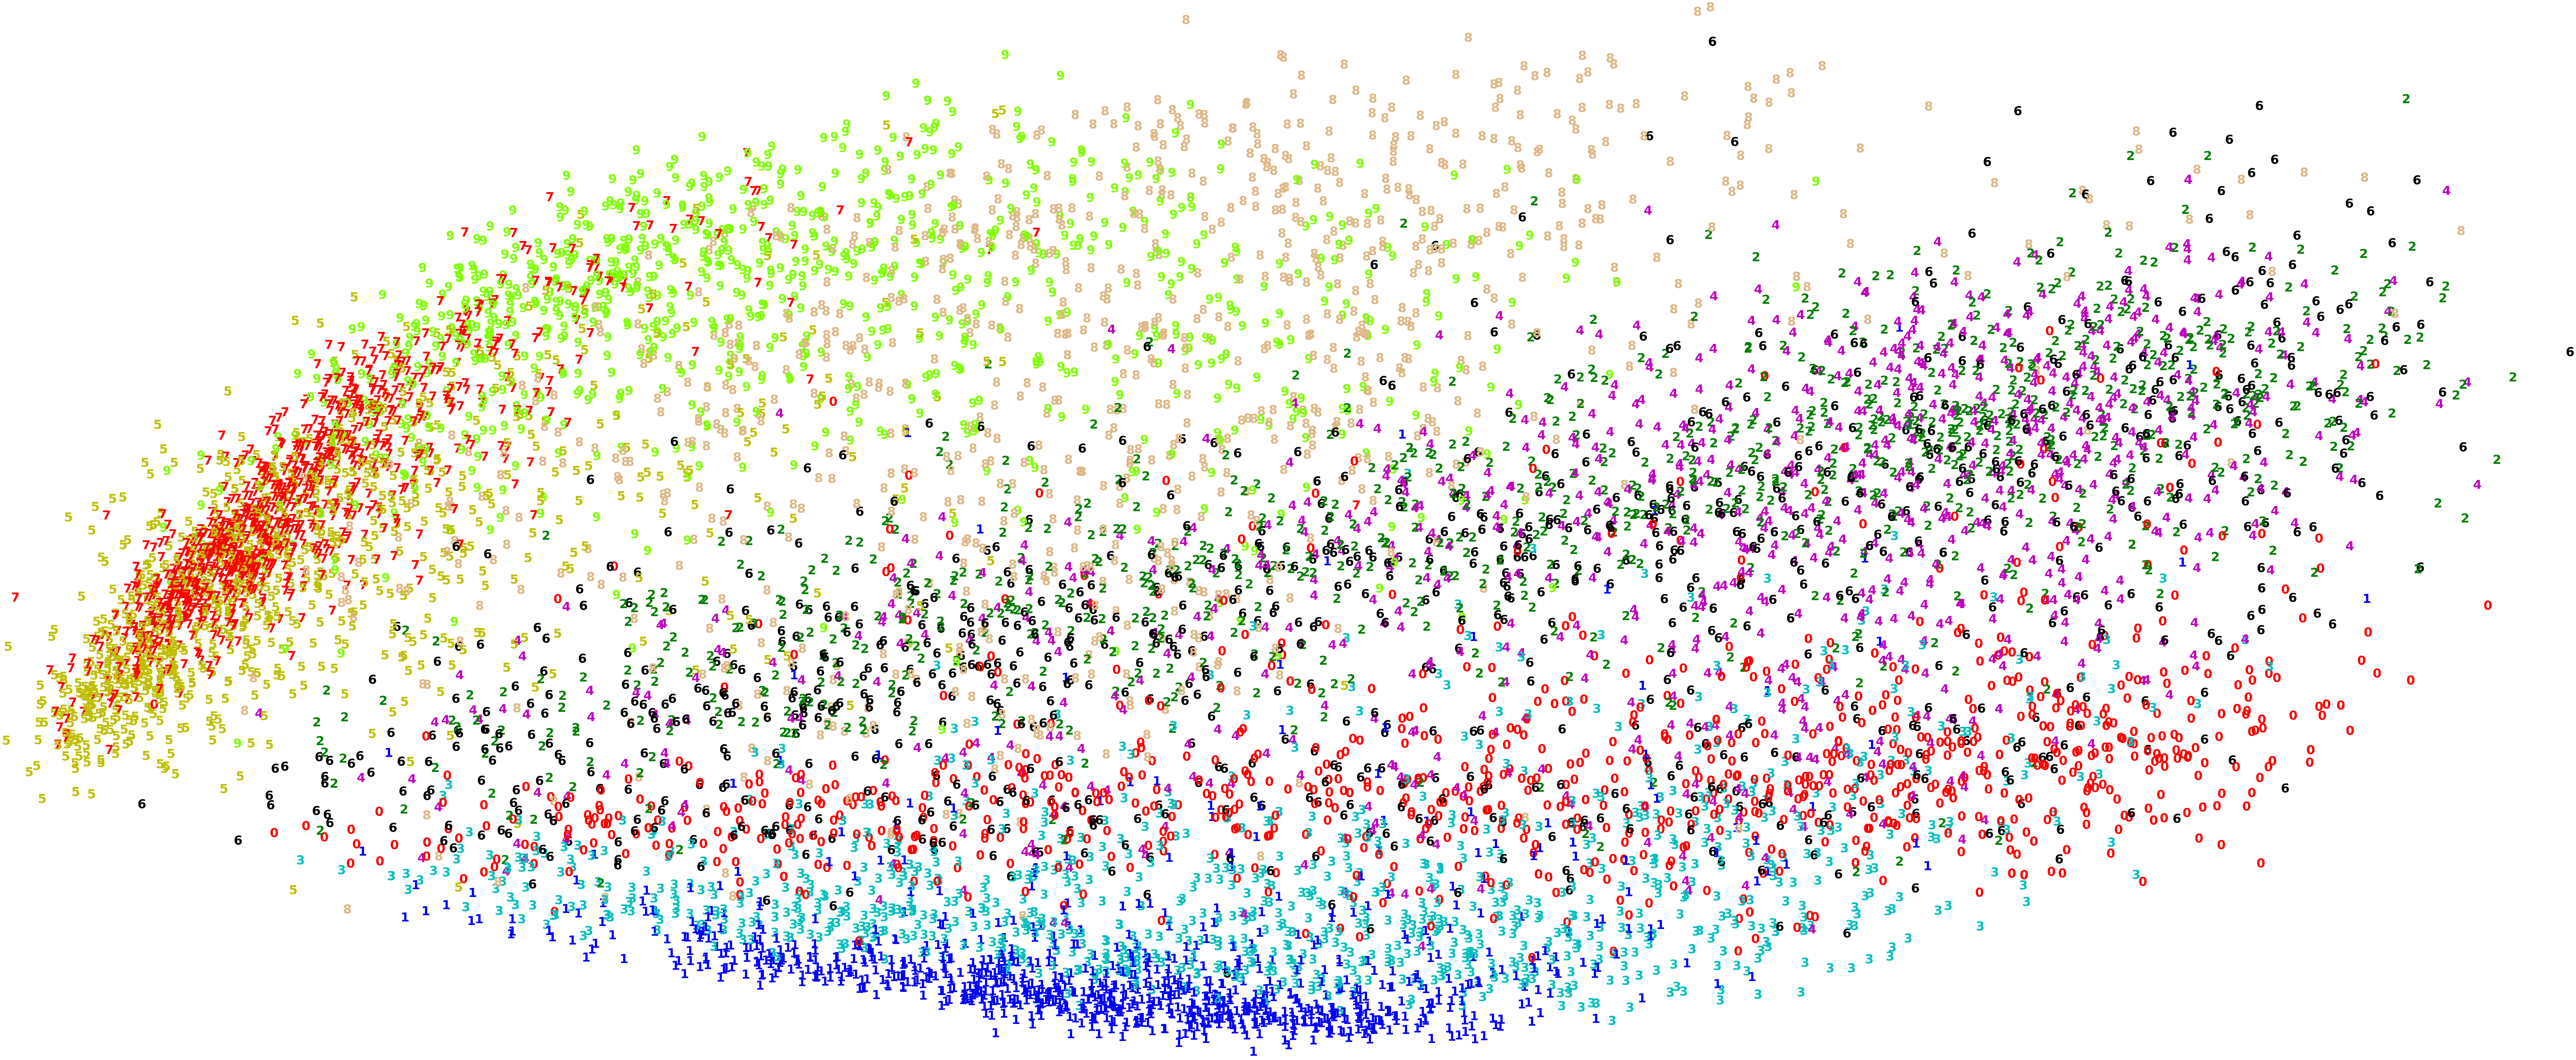

In [4]:
#Visualize data  using t he first two principal components:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(pca_components.shape[0]):
    plt.text(pca_components[i, 0], pca_components[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

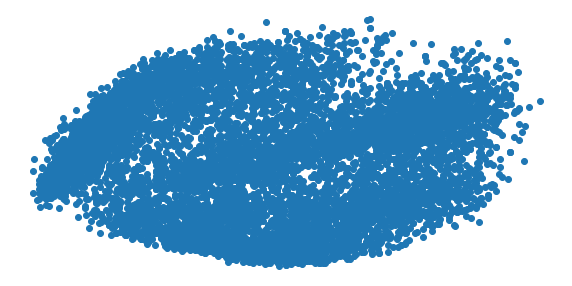

In [5]:
#Check to see if PCA solution help to distinguish between different classes:
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

#Below figure does not seem allow us to infer the classes through visualization.
#In the colored and labeled graph above, PCA can gather together the observations of the same classes to some degree.
#However, observations from all of the classes intertwined each other and can't be distinguished without coloring or labeling so PCA solution is not satisfactory.